<h3 style="text-align:center"> <b>Formula 1</b> Data Analysis 2</h3>

Version 1.0.0  
Author: [Dorian ROUX](https://rouxdorian.com)  
Estimated Runtime: < 2 minutes. 
 
---- 

#### Libraries

In [5]:
# - Import Libraries - 
import datetime
import numpy as np
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import itertools
import math

#### Functions

In [6]:
# - Update a dictionnary - #
def updateDictionnary(inputDict: dict, outputDict: dict, inputKeys: list, outputKeys: list):
    """Update a dictionnary by adding a new key and value based on the existance of the inputKeys within the inputDict.
    Args:
        inputDict (dict): the input dictionnary.
        outputDict (dict): the output dictionnary.
        inputKeys (list): the list of keys to look for in the inputDict.
        outputKeys (list): the list of keys to add in the outputDict depending on the inputKeys.
    """    
    for i_, inputKey in enumerate(inputKeys):
        if inputKey in inputDict.keys():
            outputDict[outputKeys[i_]] = inputDict[inputKey]
    return outputDict

# - Transform an Integer into a String based on the "," separator - #
def transformInteger_intoStr(value: int):
    """Transform an integer into a string with commas for thousands separators.
    Args:
        value (int): the integer to transform.
    Returns:
        str: the string with commas for thousands separators.
    """    
    # Convert the integer value to a string with commas for thousands separators
    formatted_value = "{:,}".format(value)
    return formatted_value

# - Export a dictionnary as a JSON file - #
def exportJSON(dictContent: dict, filePath: str):
    """Export a dictionnary as a JSON file.
    Args:
        dictContent (dict): the dictionary to export.
        filePath (str): the path where to export the file.
    """    
    if not os.path.exists(os.path.dirname(filePath)):
        os.makedirs(os.path.dirname(filePath), exist_ok=True)
    with open(filePath, 'w') as fp:
        json.dump(dictContent, fp, indent=4)

# - Export a DataFrame as a CSV file - #
def exportCSV(df: pd.DataFrame, filePath: str):
    """Export a DataFrame as a CSV file.
    Args:
        df (pd.DataFrame): the DataFrame to export.
        filePath (str): the path where to export the file.
    """    
    if not os.path.exists(os.path.dirname(filePath)):
        os.makedirs(os.path.dirname(filePath), exist_ok=True)
    df.to_csv(filePath, index=False)

#### Core

- Qualifying Results by Number of Pole Position and Pole Position %

In [35]:
# Data Folder
dataFolder = '../data'
dataProcessedFolder = os.path.join(dataFolder, 'processed')
dataPrscImagesFolder = os.path.join(dataProcessedFolder, 'images')

# Load the data
dictQualifying = json.load(open(os.path.join(dataFolder, 'formula1-qualifying-results.json'), 'r'))
dictCircuits = json.load(open(os.path.join(dataFolder, 'formula1-circuits.json'), 'r'))
dictDrivers = json.load(open(os.path.join(dataFolder, 'formula1-drivers.json'), 'r'))
dictConstructors = json.load(open(os.path.join(dataFolder, 'formula1-constructors.json'), 'r'))

# We do not take into account the current Season equivalent to CURRENT YEAR
del dictQualifying[(str(datetime.datetime.now().year))]

In [45]:
lstQualifying = []

for raceSeason, seasonData in dictQualifying.items():
    for raceRound, raceData in seasonData.items():
        if not raceData:
            continue
        
        raceName, raceCircuit, raceDate = raceData['RACE_NAME'], dictCircuits[raceData['CIRCUIT']]['CIRCUIT_NAME'], raceData['DATE']
        for i, result in enumerate(raceData['RESULTS']):
            qPosition = int(result['POSITION'])
            isInPole = True if qPosition == 1 else False
            isAmountTop3 = True if qPosition <= 3 else False
            isAmongTop5 = True if qPosition <= 5 else False
            isAmountTop10 = True if qPosition <= 10 else False
            isAmountTop15 = True if qPosition <= 15 else False
            
            qPrct = qPosition / len(raceData['RESULTS'])
            isBetterThanAverage = True if qPrct < 0.5 else False
            isBetterThan33 = True if qPrct < 0.33 else False
            isBetterThan25 = True if qPrct < 0.25 else False
            
            
            lstQualifying.append({
                'SEASON': int(raceSeason),
                'ROUND': int(raceRound),
                'RACE_NAME': raceName,
                'RACE_CIRCUIT': raceCircuit,
                'RACE_DATE': raceDate,
                'Q_POSITION': qPosition,
                'DRIVER': f"{dictDrivers[result['DRIVER']]['GIVEN_NAME']} {dictDrivers[result['DRIVER']]['FAMILY_NAME']}",
                'CONSTRUCTOR': dictConstructors[result['CONSTRUCTOR']]['NAME'],
                'Q1': result['Q1'],
                'Q2': result['Q2'],
                'Q3': result['Q3'],
                'IS_POLE': isInPole,
                'IS_TOP3': isAmountTop3,
                'IS_TOP5': isAmongTop5,
                'IS_TOP10': isAmountTop10,
                'IS_TOP15': isAmountTop15,
                'IS_BETTER_THAN_AVERAGE': isBetterThanAverage,
                'IS_BETTER_THAN_33': isBetterThan33,
                'IS_BETTER_THAN_25': isBetterThan25
            })
            
df_qualifying = pd.DataFrame.from_records(lstQualifying).sort_values(by=['SEASON', 'ROUND', 'Q_POSITION']).reset_index(drop=True)
df_qualifying.sample(5)

,SEASON,ROUND,RACE_NAME,RACE_CIRCUIT,RACE_DATE,Q_POSITION,DRIVER,CONSTRUCTOR,Q1,Q2,Q3,IS_POLE,IS_TOP3,IS_TOP5,IS_TOP10,IS_TOP15,IS_BETTER_THAN_AVERAGE,IS_BETTER_THAN_33,IS_BETTER_THAN_25
7382,2017,14,Singapore Grand Prix,Marina Bay Street Circuit,2017-09-17,4,Kimi Räikkönen,Ferrari,1:43.328,1:40.525,1:40.069,False,False,True,True,True,True,True,True
2368,2005,8,Canadian Grand Prix,Circuit Gilles Villeneuve,2005-06-12,5,Juan Pablo Montoya,McLaren,1:15.669,,,False,False,True,True,True,True,True,False
9308,2022,9,Canadian Grand Prix,Circuit Gilles Villeneuve,2022-06-19,14,Lando Norris,McLaren,1:34.066,,,False,False,False,False,True,False,False,False
2555,2005,17,Brazilian Grand Prix,Autódromo José Carlos Pace,2005-09-25,12,Jacques Villeneuve,Sauber,1:13.372,,,False,False,False,False,True,False,False,False
5785,2013,15,Japanese Grand Prix,Suzuka Circuit,2013-10-13,12,Paul di Resta,Force India,1:32.286,1:31.992,,False,False,False,False,True,False,False,False


In [130]:
# Number of Qualifying, Poles, Top3, Top5, Top10, Top15, Better than Average, Better than 33, Better than 25    
df_qualifying_summary = df_qualifying.groupby(['DRIVER']).agg({
    'Q_POSITION': 'count',
    'IS_POLE': 'sum',
    'IS_TOP3': 'sum',
    'IS_TOP5': 'sum',
    'IS_TOP10': 'sum',
    'IS_TOP15': 'sum',
    'IS_BETTER_THAN_AVERAGE': 'sum',
    'IS_BETTER_THAN_33': 'sum',
    'IS_BETTER_THAN_25': 'sum'
}).reset_index()

df_qualifying_summary['PP%'] = df_qualifying_summary['IS_POLE'] / df_qualifying_summary['Q_POSITION']
df_qualifying_summary.sort_values(by=['IS_POLE', 'IS_TOP3', 'IS_TOP5', 'IS_TOP10', 'IS_TOP15', 'IS_BETTER_THAN_AVERAGE', 'IS_BETTER_THAN_33', 'IS_BETTER_THAN_25'], ascending=False, inplace=True)
df_qualifying_summary = df_qualifying_summary.reset_index(drop=True)

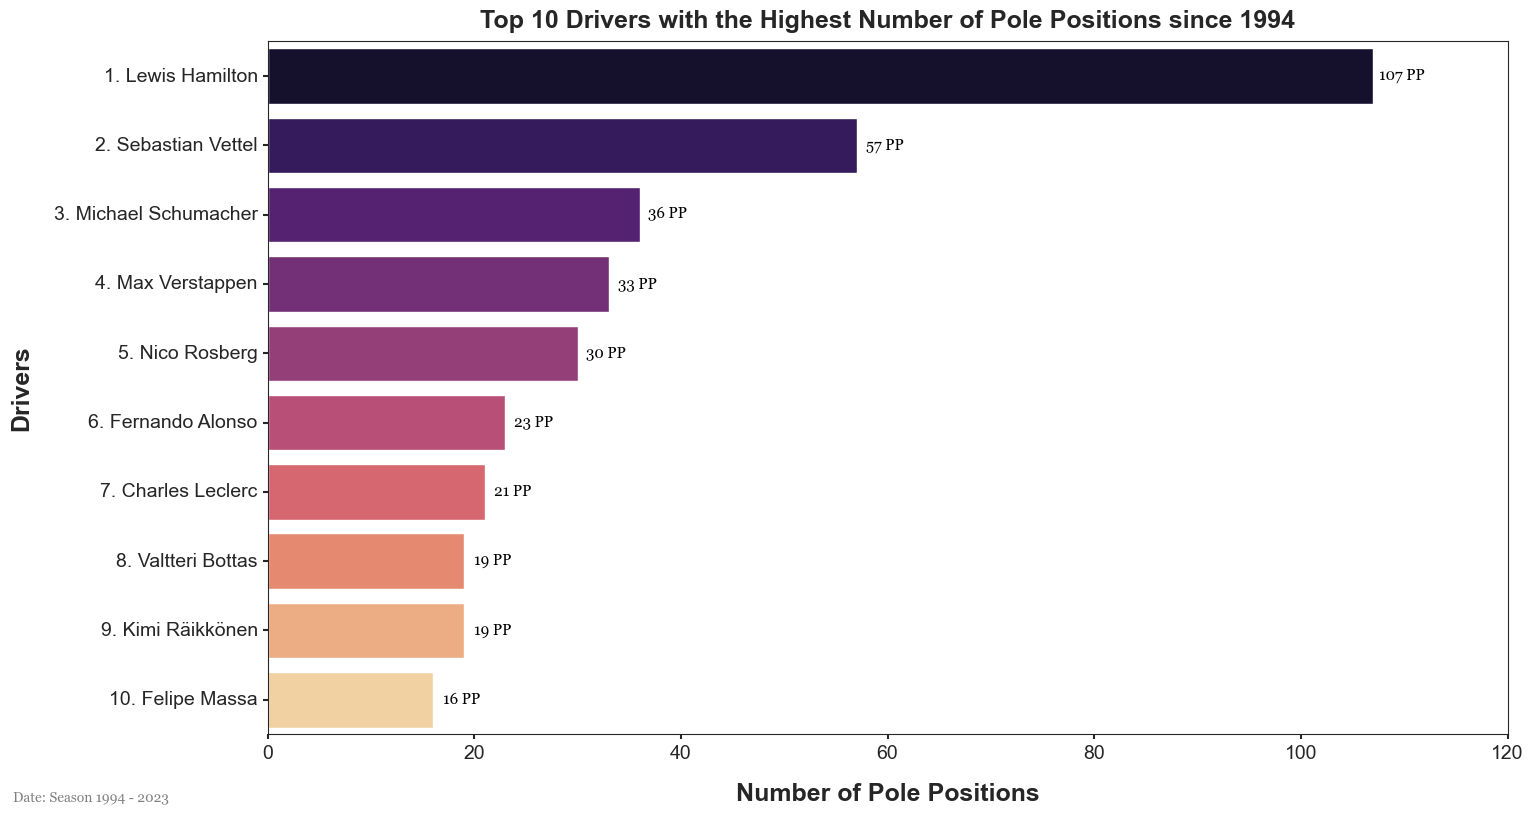

In [128]:
# Build the Figure
sns.set_style("white")
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
plt.rc('font', family='Georgia')

# Build the Barplot
df = df_qualifying_summary.reset_index(drop=True).head(10).copy()
slct_palette = "magma"
ax = sns.barplot(x='IS_POLE', y='DRIVER', data=df, palette=slct_palette)
ax.set_title('Top 10 Drivers with the Highest Number of Pole Positions since 1994', fontsize=18, fontweight='bold', pad=10)
ax.set_xlabel("Number of Pole Positions", size=18, fontweight='bold', labelpad=15)
ax.set_ylabel("Drivers", size=18, fontweight='bold', labelpad=15)
ax.set_yticklabels([f"{i+1}. {value}" for i,value in enumerate(df['DRIVER'])], va='center')
ax.tick_params(axis='x', bottom=True, labelsize=14, width=1.5)
ax.tick_params(axis='y', left=True, labelsize=14, width=1.5)
plt.xlim([0, 120])

# Display the Values on the Bars
for index, row in df_qualifying_summary.head(10).iterrows():
    plt.text(row['IS_POLE'] + 2.75, index + 0.05, f"{row['IS_POLE']} PP", color='black', ha="center", fontdict={'fontsize': 11})

# Insert Side Note
ax.text(-9.5, 10.45, 'Date: Season 1994 - 2023', fontsize=10, color='gray', ha='right')

# Save the Plot
os.makedirs(dataPrscImagesFolder, exist_ok=True)
plt.savefig(os.path.join(dataPrscImagesFolder, 'top-10-drivers-highest-number-pole-positions.png'), bbox_inches='tight')

# Show the Plot
plt.show()

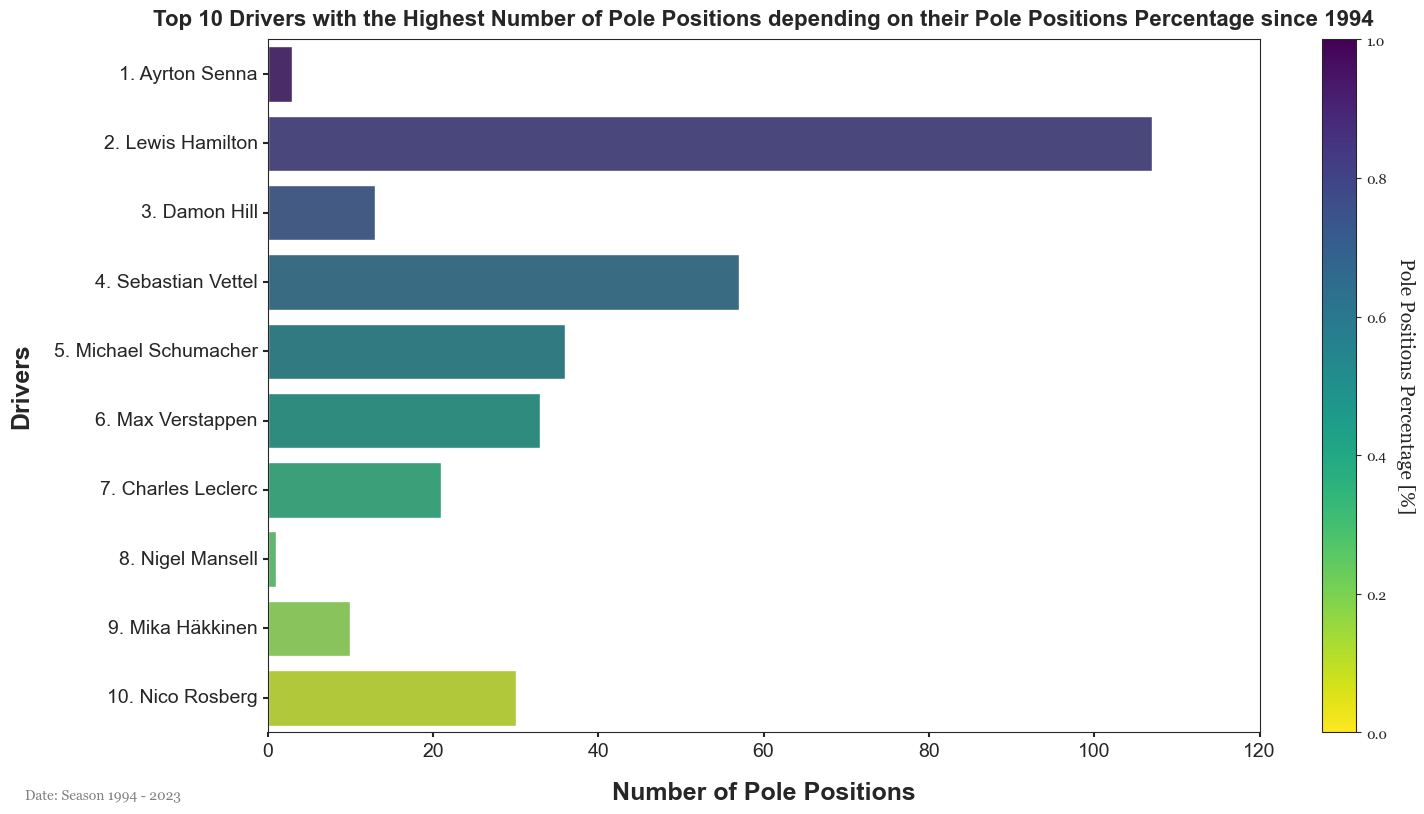

In [138]:
# Build the Figure
sns.set_style("white")
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
plt.rc('font', family='Georgia')

# Build the Barplot
df = df_qualifying_summary.sort_values(by=['PP%'], ascending=False).head(10).copy()
slct_palette = "viridis"
ax = sns.barplot(x='IS_POLE', y='DRIVER', data=df, palette=slct_palette)
ax.set_title(f'Top 10 Drivers with the Highest Number of Pole Positions depending on their Pole Positions Percentage since 1994', fontsize=16, fontweight='bold', pad=10)
ax.set_xlabel("Number of Pole Positions", size=18, fontweight='bold', labelpad=15)
ax.set_ylabel("Drivers", size=18, fontweight='bold', labelpad=15)
ax.set_yticklabels([f"{i+1}. {value}" for i,value in enumerate(df['DRIVER'])], va='center')
ax.tick_params(axis='x', bottom=True, labelsize=14, width=1.5)
ax.tick_params(axis='y', left=True, labelsize=14, width=1.5)
plt.xlim([0, 120])

# Insert Side Note
ax.text(-10.5, 10.45, 'Date: Season 1994 - 2023', fontsize=10, color='gray', ha='right')

# Insert Colorbar
norm = mcolors.Normalize(vmin=round(df['PP%'].min()), vmax=round(df['PP%'].max()))
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=f"{slct_palette}_r", norm=norm), ax=ax)
cbar.set_label('Pole Positions Percentage [%]', rotation=270, labelpad=20, fontsize=14, fontname='Georgia')

# Save the Plot
os.makedirs(dataPrscImagesFolder, exist_ok=True)
plt.savefig(os.path.join(dataPrscImagesFolder, f'top-10-drivers-most-pole-positions-percentage.png'), bbox_inches='tight')

# Show the Plot
plt.show()

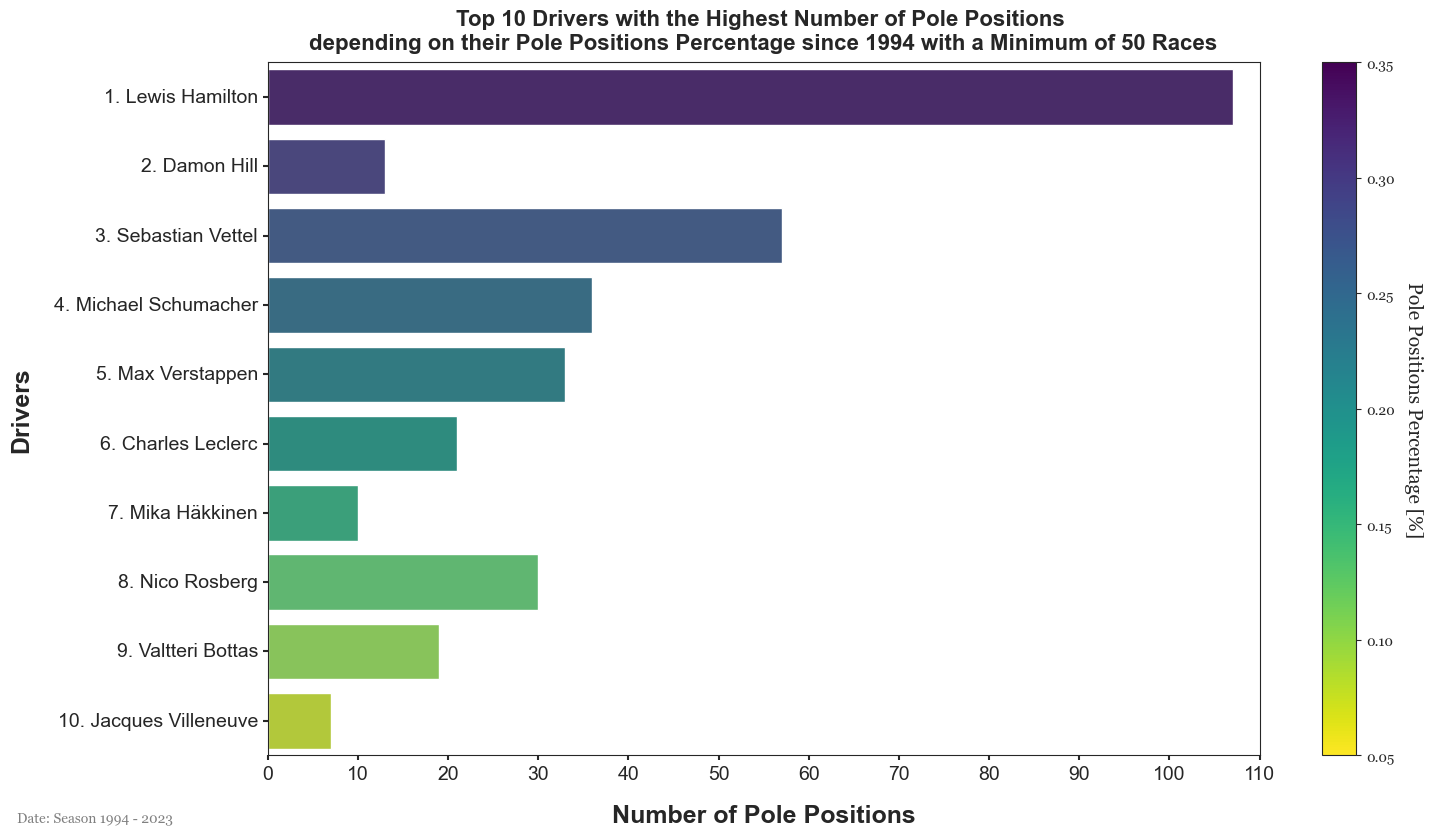

In [159]:
# Build the Figure
sns.set_style("white")
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
plt.rc('font', family='Georgia')

# Build the Barplot
filterOnQualifying = 50
df = df_qualifying_summary[df_qualifying_summary.Q_POSITION >= 50].sort_values(by=['PP%'], ascending=False).head(10).copy()
slct_palette = "viridis"
ax = sns.barplot(x='IS_POLE', y='DRIVER', data=df, palette=slct_palette)
ax.set_title(f'Top 10 Drivers with the Highest Number of Pole Positions \ndepending on their Pole Positions Percentage since 1994 with a Minimum of {filterOnQualifying} Races', fontsize=16, fontweight='bold', pad=10)
ax.set_xlabel("Number of Pole Positions", size=18, fontweight='bold', labelpad=15)
ax.set_ylabel("Drivers", size=18, fontweight='bold', labelpad=15)
ax.set_yticklabels([f"{i+1}. {value}" for i,value in enumerate(df['DRIVER'])], va='center')
ax.set_xticks(range(0, 111, 10))
ax.tick_params(axis='x', bottom=True, labelsize=14, width=1.5)
ax.tick_params(axis='y', left=True, labelsize=14, width=1.5)
plt.xlim([0, 110])


# Insert Side Note
ax.text(-10.5, 10.45, 'Date: Season 1994 - 2023', fontsize=10, color='gray', ha='right')

# Insert Colorbar
norm = mcolors.Normalize(vmin=round(df['PP%'].min() / 0.05) * 0.05 - 0.05, vmax=round(df['PP%'].max() / 0.05) * 0.05 + 0.05)
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=f"{slct_palette}_r", norm=norm), ax=ax)
cbar.set_label('Pole Positions Percentage [%]', rotation=270, labelpad=20, fontsize=14, fontname='Georgia')

# Save the Plot
os.makedirs(dataPrscImagesFolder, exist_ok=True)
plt.savefig(os.path.join(dataPrscImagesFolder, f'top-10-drivers-most-pole-positions-percentage-{filterOnQualifying}qualifying.png'), bbox_inches='tight')

# Show the Plot
plt.show()

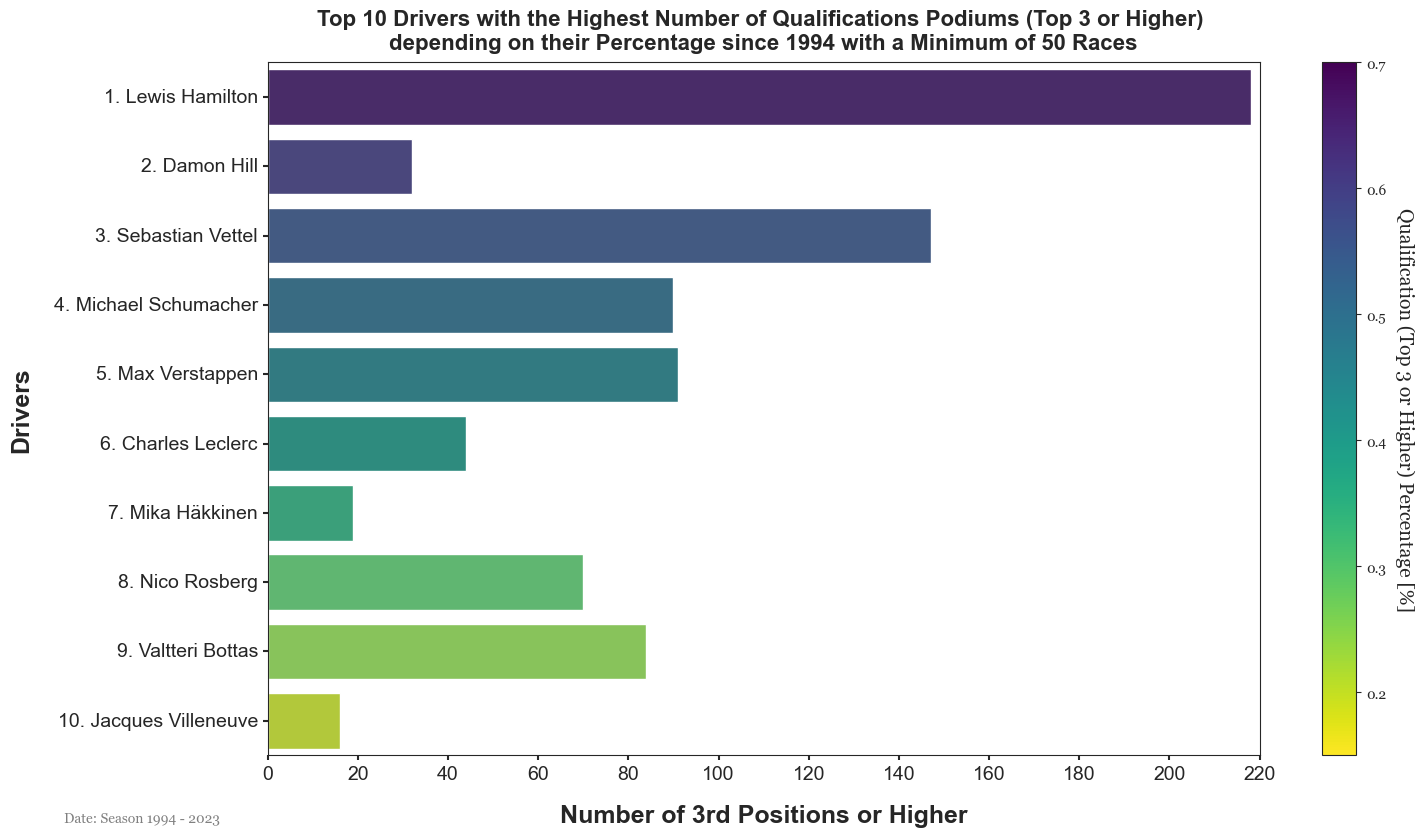

In [174]:
# Build the Figure
sns.set_style("white")
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
plt.rc('font', family='Georgia')

# Build the Barplot
filterOnQualifying = 50
df_qualifying_summary['PPT3%'] = df_qualifying_summary['IS_TOP3'] / df_qualifying_summary['Q_POSITION']
df = df_qualifying_summary[df_qualifying_summary.Q_POSITION >= 50].sort_values(by=['PP%'], ascending=False).head(10).copy()
slct_palette = "viridis"
ax = sns.barplot(x='IS_TOP3', y='DRIVER', data=df, palette=slct_palette)
ax.set_title(f'Top 10 Drivers with the Highest Number of Qualifications Podiums (Top 3 or Higher) \ndepending on their Percentage since 1994 with a Minimum of {filterOnQualifying} Races', fontsize=16, fontweight='bold', pad=10)
ax.set_xlabel("Number of 3rd Positions or Higher", size=18, fontweight='bold', labelpad=15)
ax.set_ylabel("Drivers", size=18, fontweight='bold', labelpad=15)
ax.set_yticklabels([f"{i+1}. {value}" for i,value in enumerate(df['DRIVER'])], va='center')
ax.set_xticks(range(0, 221, 20))
ax.tick_params(axis='x', bottom=True, labelsize=14, width=1.5)
ax.tick_params(axis='y', left=True, labelsize=14, width=1.5)
plt.xlim([0, 220])


# Insert Side Note
ax.text(-10.5, 10.45, 'Date: Season 1994 - 2023', fontsize=10, color='gray', ha='right')

# Insert Colorbar
norm = mcolors.Normalize(vmin=round(df['PPT3%'].min() / 0.05) * 0.05 - 0.05, vmax=round(df['PPT3%'].max() / 0.05) * 0.05 + 0.05)
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=f"{slct_palette}_r", norm=norm), ax=ax)
cbar.set_label('Qualification (Top 3 or Higher) Percentage [%]', rotation=270, labelpad=20, fontsize=14, fontname='Georgia')

# Save the Plot
os.makedirs(dataPrscImagesFolder, exist_ok=True)
plt.savefig(os.path.join(dataPrscImagesFolder, f'top-10-drivers-most-top3-or-higher-positions-percentage-{filterOnQualifying}qualifying.png'), bbox_inches='tight')

# Show the Plot
plt.show()

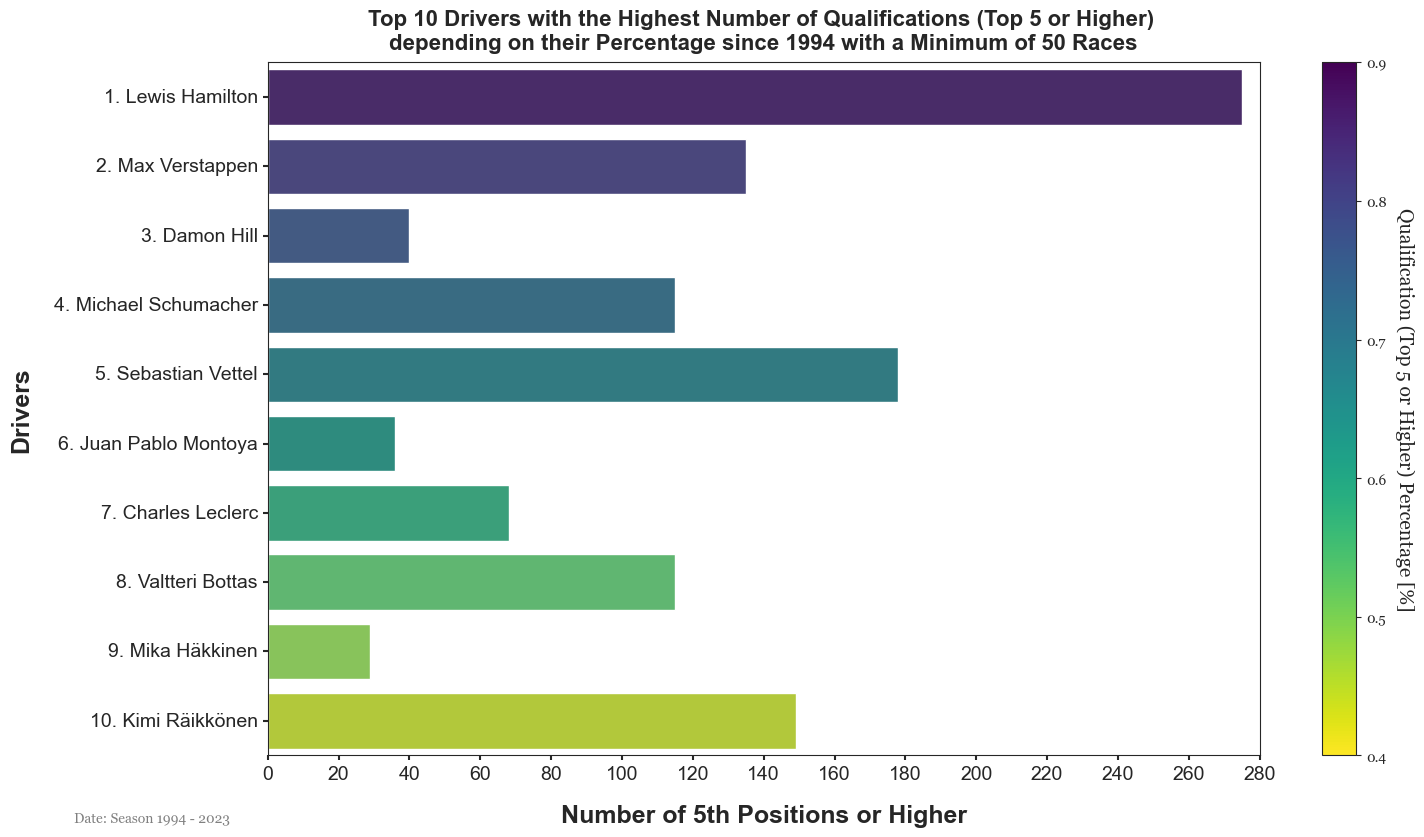

In [200]:
# Build the Figure
sns.set_style("white")
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
plt.rc('font', family='Georgia')

# Build the Barplot
filterOnQualifying = 50
df_qualifying_summary['PPT5%'] = df_qualifying_summary['IS_TOP5'] / df_qualifying_summary['Q_POSITION']
df = df_qualifying_summary[df_qualifying_summary.Q_POSITION >= 50].sort_values(by=['PPT5%'], ascending=False).head(10).copy()
slct_palette = "viridis"
ax = sns.barplot(x='IS_TOP5', y='DRIVER', data=df, palette=slct_palette)
ax.set_title(f'Top 10 Drivers with the Highest Number of Qualifications (Top 5 or Higher) \ndepending on their Percentage since 1994 with a Minimum of {filterOnQualifying} Races', fontsize=16, fontweight='bold', pad=10)
ax.set_xlabel("Number of 5th Positions or Higher", size=18, fontweight='bold', labelpad=15)
ax.set_ylabel("Drivers", size=18, fontweight='bold', labelpad=15)
ax.set_yticklabels([f"{i+1}. {value}" for i,value in enumerate(df['DRIVER'])], va='center')
ax.set_xticks(range(0, 281, 20))
ax.tick_params(axis='x', bottom=True, labelsize=14, width=1.5)
ax.tick_params(axis='y', left=True, labelsize=14, width=1.5)
plt.xlim([0, 280])


# Insert Side Note
ax.text(-10.5, 10.45, 'Date: Season 1994 - 2023', fontsize=10, color='gray', ha='right')

# Insert Colorbar
norm = mcolors.Normalize(vmin=round(df['PPT5%'].min() / 0.05) * 0.05 - 0.05, vmax=min(1, round(df['PPT5%'].max() / 0.05) * 0.05 + 0.05))
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=f"{slct_palette}_r", norm=norm), ax=ax)
cbar.set_label('Qualification (Top 5 or Higher) Percentage [%]', rotation=270, labelpad=20, fontsize=14, fontname='Georgia')

# Save the Plot
os.makedirs(dataPrscImagesFolder, exist_ok=True)
plt.savefig(os.path.join(dataPrscImagesFolder, f'top-10-drivers-most-top5-or-higher-positions-percentage-{filterOnQualifying}qualifying.png'), bbox_inches='tight')

# Show the Plot
plt.show()

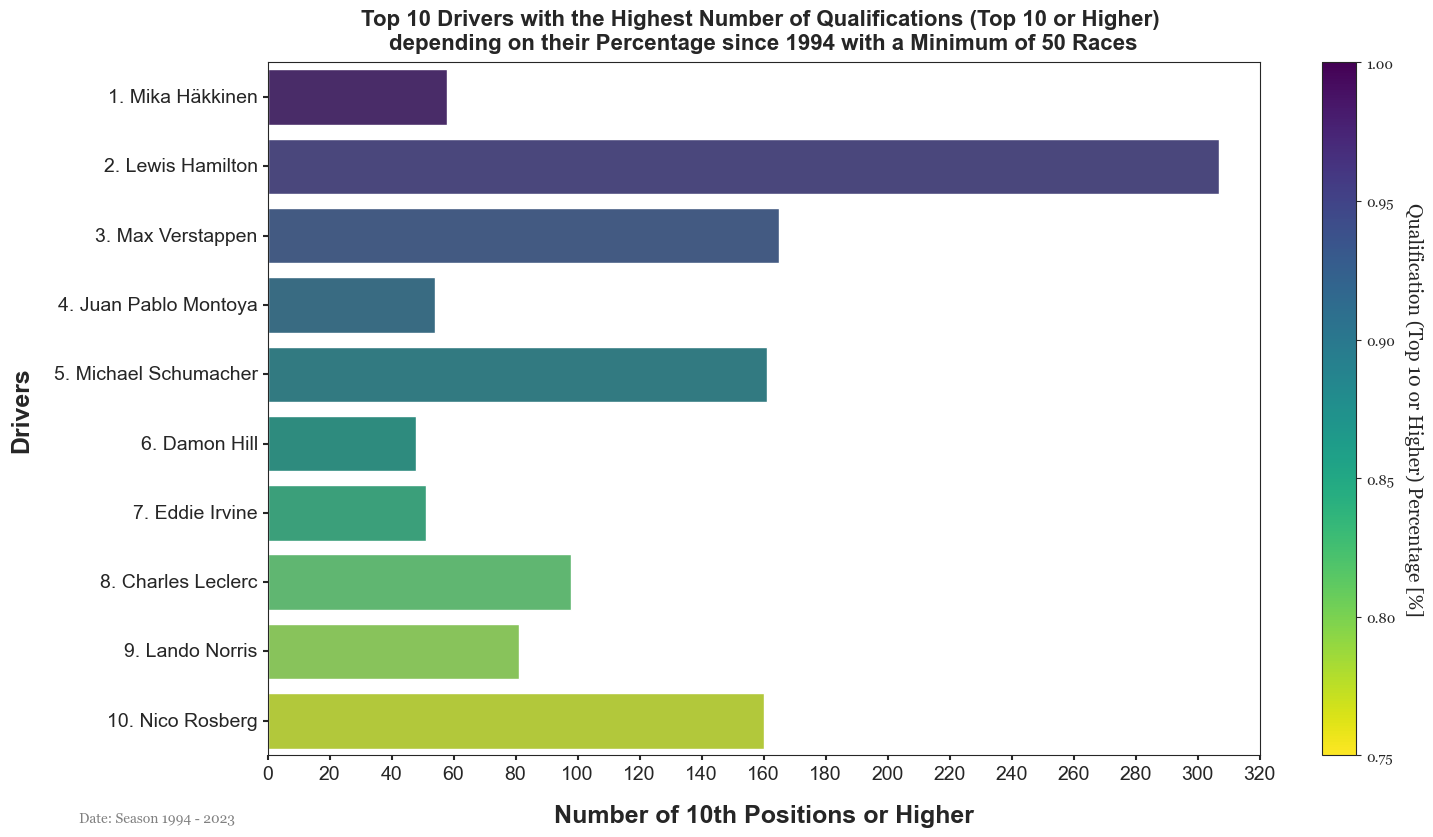

In [199]:
# Build the Figure
sns.set_style("white")
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
plt.rc('font', family='Georgia')

# Build the Barplot
filterOnQualifying = 50
df_qualifying_summary['PPT10%'] = df_qualifying_summary['IS_TOP10'] / df_qualifying_summary['Q_POSITION']
df = df_qualifying_summary[df_qualifying_summary.Q_POSITION >= 50].sort_values(by=['PPT10%'], ascending=False).head(10).copy()
slct_palette = "viridis"
ax = sns.barplot(x='IS_TOP10', y='DRIVER', data=df, palette=slct_palette)
ax.set_title(f'Top 10 Drivers with the Highest Number of Qualifications (Top 10 or Higher) \ndepending on their Percentage since 1994 with a Minimum of {filterOnQualifying} Races', fontsize=16, fontweight='bold', pad=10)
ax.set_xlabel("Number of 10th Positions or Higher", size=18, fontweight='bold', labelpad=15)
ax.set_ylabel("Drivers", size=18, fontweight='bold', labelpad=15)
ax.set_yticklabels([f"{i+1}. {value}" for i,value in enumerate(df['DRIVER'])], va='center')
ax.set_xticks(range(0, 321, 20))
ax.tick_params(axis='x', bottom=True, labelsize=14, width=1.5)
ax.tick_params(axis='y', left=True, labelsize=14, width=1.5)
plt.xlim([0, 320])


# Insert Side Note
ax.text(-10.5, 10.45, 'Date: Season 1994 - 2023', fontsize=10, color='gray', ha='right')

# Insert Colorbar
norm = mcolors.Normalize(vmin=round(df['PPT10%'].min() / 0.05) * 0.05 - 0.05, vmax=min(1, round(df['PPT10%'].max() / 0.05) * 0.05 + 0.05))
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=f"{slct_palette}_r", norm=norm), ax=ax)
cbar.set_label('Qualification (Top 10 or Higher) Percentage [%]', rotation=270, labelpad=20, fontsize=14, fontname='Georgia')

# Save the Plot
os.makedirs(dataPrscImagesFolder, exist_ok=True)
plt.savefig(os.path.join(dataPrscImagesFolder, f'top-10-drivers-most-top10-or-higher-positions-percentage-{filterOnQualifying}qualifying.png'), bbox_inches='tight')

# Show the Plot
plt.show()

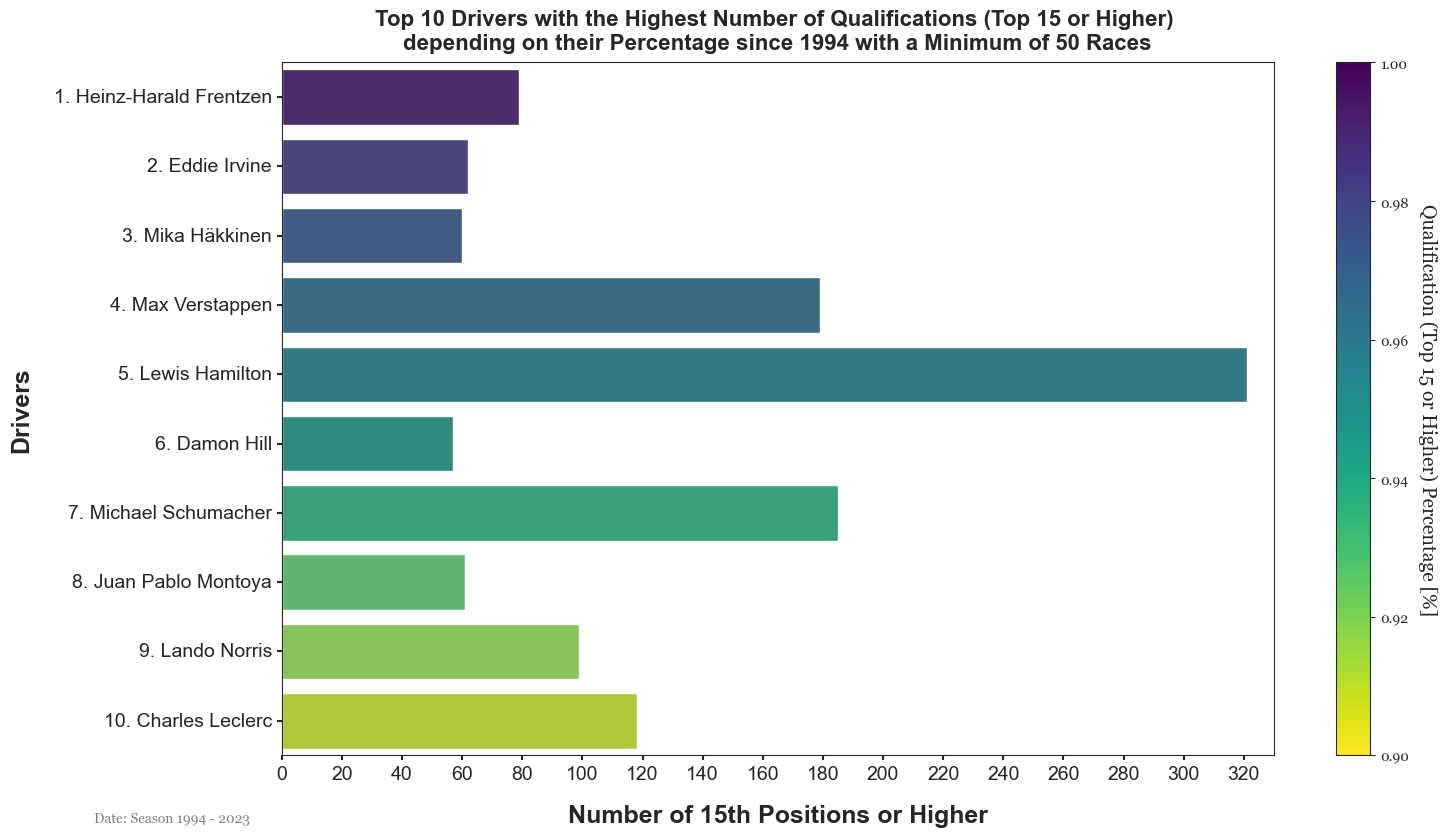

In [198]:
# Build the Figure
sns.set_style("white")
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
plt.rc('font', family='Georgia')

# Build the Barplot
filterOnQualifying = 50
df_qualifying_summary['PPT15%'] = df_qualifying_summary['IS_TOP15'] / df_qualifying_summary['Q_POSITION']
df = df_qualifying_summary[df_qualifying_summary.Q_POSITION >= 50].sort_values(by=['PPT15%'], ascending=False).head(10).copy()
slct_palette = "viridis"
ax = sns.barplot(x='IS_TOP15', y='DRIVER', data=df, palette=slct_palette)
ax.set_title(f'Top 10 Drivers with the Highest Number of Qualifications (Top 15 or Higher) \ndepending on their Percentage since 1994 with a Minimum of {filterOnQualifying} Races', fontsize=16, fontweight='bold', pad=10)
ax.set_xlabel("Number of 15th Positions or Higher", size=18, fontweight='bold', labelpad=15)
ax.set_ylabel("Drivers", size=18, fontweight='bold', labelpad=15)
ax.set_yticklabels([f"{i+1}. {value}" for i,value in enumerate(df['DRIVER'])], va='center')
ax.set_xticks(range(0, 321, 20))
ax.tick_params(axis='x', bottom=True, labelsize=14, width=1.5)
ax.tick_params(axis='y', left=True, labelsize=14, width=1.5)
plt.xlim([0, 330])


# Insert Side Note
ax.text(-10.5, 10.45, 'Date: Season 1994 - 2023', fontsize=10, color='gray', ha='right')

# Insert Colorbar
norm = mcolors.Normalize(vmin=round(df['PPT15%'].min() / 0.05) * 0.05 - 0.05, vmax=min(1, round(df['PPT15%'].max() / 0.05) * 0.05 + 0.05))
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=f"{slct_palette}_r", norm=norm), ax=ax)
cbar.set_label('Qualification (Top 15 or Higher) Percentage [%]', rotation=270, labelpad=20, fontsize=14, fontname='Georgia')

# Save the Plot
os.makedirs(dataPrscImagesFolder, exist_ok=True)
plt.savefig(os.path.join(dataPrscImagesFolder, f'top-10-drivers-most-top15-or-higher-positions-percentage-{filterOnQualifying}qualifying.png'), bbox_inches='tight')

# Show the Plot
plt.show()